In [6]:
import csv
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
dataredwine = pd.read_csv('/Users/yessinradouane/Desktop/Uni/ML/Assignment1/winequality/winequality-white.csv', sep=';')
datawhitewine = pd.read_csv('/Users/yessinradouane/Desktop/Uni/ML/Assignment1/winequality/winequality-red.csv', sep=';')

In [7]:
dataredwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
datawhitewine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**1.1 Data**
Based on the nature of the features, all of the features are in the appropriate data type, they should all be float. With the exception of quality being an integer (as it is the median evaluation of 3 wine experts between 0-10 which will be an int). 

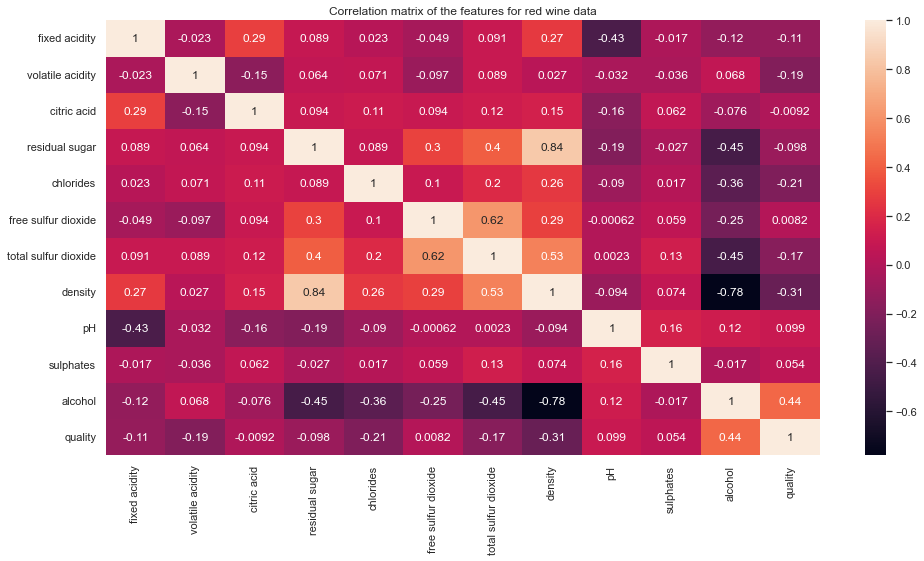

<Figure size 1152x576 with 0 Axes>

In [9]:
import seaborn as sn
def return_corrMatrix(dataredwine):
    corrM=dataredwine.corr()
    sn.set(rc={"figure.figsize":(16,8)})
    sn.heatmap(corrM,annot=True)
    plt.title(f"Correlation matrix of the features for red wine data")
    plt.figure()
return_corrMatrix(dataredwine)

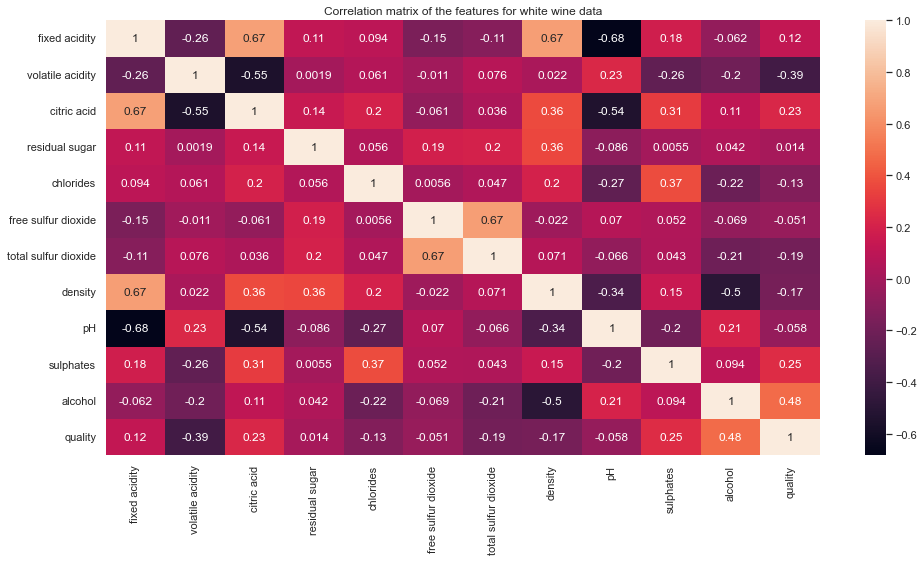

<Figure size 1152x576 with 0 Axes>

In [10]:
import seaborn as sn
def return_corrMatrix(datawhitewine):
    corrM=datawhitewine.corr()
    sn.set(rc={"figure.figsize":(16,8)})
    sn.heatmap(corrM,annot=True)
    plt.title(f"Correlation matrix of the features for white wine data")
    plt.figure()
return_corrMatrix(datawhitewine)

<AxesSubplot:xlabel='density', ylabel='residual sugar'>

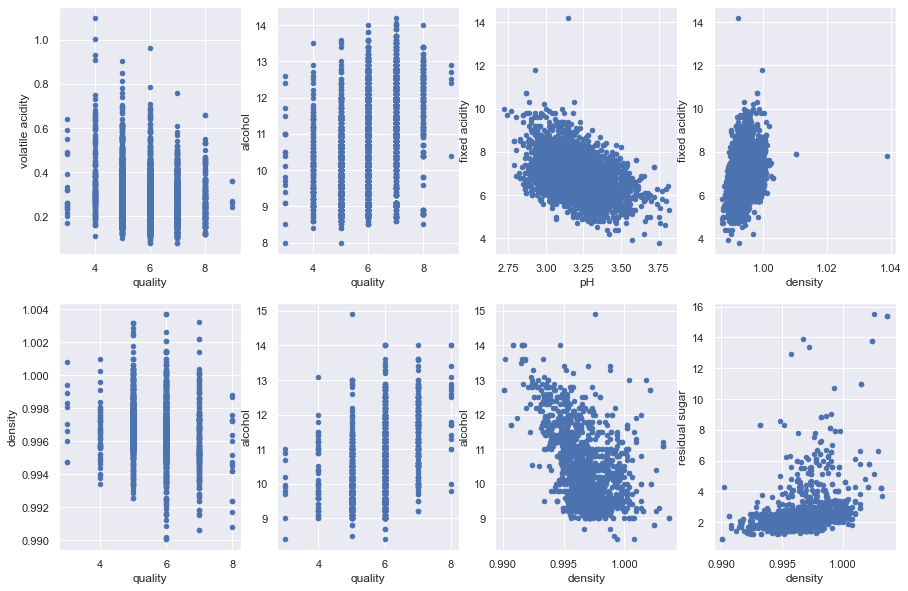

In [11]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
dataredwine.plot(kind='scatter',x='quality',y='volatile acidity', ax=ax[0,0])
dataredwine.plot(kind='scatter',x='quality',y='alcohol', ax=ax[0,1])
dataredwine.plot(kind='scatter',x='pH',y='fixed acidity', ax=ax[0,2])
dataredwine.plot(kind='scatter',x='density',y='fixed acidity', ax=ax[0,3])

datawhitewine.plot(kind='scatter',x='quality',y='density', ax=ax[1,0])
datawhitewine.plot(kind='scatter',x='quality',y='alcohol', ax=ax[1,1])
datawhitewine.plot(kind='scatter',y='alcohol',x='density', ax=ax[1,2])
datawhitewine.plot(kind='scatter',y='residual sugar',x='density', ax=ax[1,3])


**1.2 Data**
Use appropriate plots to demonstrate the distribution of the features and the target variable and check for correlations between different features. In less than 50 words, summarize your findings.


**Row 1 is red white, Row 2 is white wine.** <br> 
**Red:** <br>
Quality volatile acidity: -0.39 <br>
Quality Alcohol: 0.48<br>
pH fixed acidity: -0.68<br>
Density fixed acidity: +0.67<br>

**White:** <br>
Quality Density: -0.31<br>
Quality Alcohol: 0.44<br>
Alcohol Density: -0.78<br>
Residual sugar density: 0.84 <br>

Both: From both red and white alcohol has a positive corrleation with quality (+0.48, +0.44) this is because alcohol content affects flavour and texture of wine helping to balance sweetness and acidity in a positive manner. 

White: Alcohol makes wine less dense with a strong negative correlation (-0.78), higher alcohol less means a less dense wine, since quality is affected by both density and alcohol we can see the relations in effect. Higher alcohol content is given a higher quality rating (+0.44) and a lower density wine given a higher quality rating (-0.31) which correlates to the alcohol and density (-0.78). <br>
The highest correlation in whites is sugar and density (+0.84), as residual sugar has a higher mass and density is a measure of mass/volume the more sugar left the greater the mass and therefore the density.

Red: The highest correlation in reds was pH and fixed acidity,(-0.68), as pH is a measure for acidity it's clear this feature should have a strong correlation. 



**2.1 Closed-form OLS Solution**
Generate a random regression problem using the sklearn.datasets.make regression utility. Use a suitable number of features and samples. Crucially, in make regression, set coef to True to obtain the coefficients of the underlying linear model. Save these coefficients in a variable coeffs.

In [12]:
import sklearn 
from sklearn.datasets import make_regression
sklearn.datasets.make_regression(n_samples=20, n_features=10,coef=True)
x, y, coeffs = sklearn.datasets.make_regression(n_samples=20, n_features=10,coef=True)
print(coeffs)

[56.35213001 18.17841488 91.35866917 24.42735741 92.69354707 54.55273937
 23.62297285  6.6959769  65.29418682 31.45573466]


**2.2** Use the optimal parameters obtained via the closed-form solution (eq. (2)) to obtain the set of parameters that minimize the least squares objective.


In [13]:
OLS = np.matmul(np.linalg.inv((np.matmul(np.transpose(x), x))), np.matmul(np.transpose(x), y))
print(OLS)

[56.35213001 18.17841488 91.35866917 24.42735741 92.69354707 54.55273937
 23.62297285  6.6959769  65.29418682 31.45573466]


**2.3** Verify if the parameters obtained from the closed-form solution are the same as coeffs and report your results. What is a potential shortcoming of the closed-form approach?

In [14]:
print((coeffs==OLS).all())
print(OLS.shape==coeffs.shape)
for i in range(len(coeffs)):
    print(f"difference in element {i}: {coeffs[i]-OLS[i]}: {coeffs[i]==OLS[i]}")

False
True
difference in element 0: 2.1316282072803006e-14: False
difference in element 1: 2.4868995751603507e-14: False
difference in element 2: 5.684341886080802e-14: False
difference in element 3: -6.039613253960852e-14: False
difference in element 4: 0.0: True
difference in element 5: 0.0: True
difference in element 6: 1.4210854715202004e-14: False
difference in element 7: -2.6645352591003757e-15: False
difference in element 8: -2.842170943040401e-14: False
difference in element 9: 1.0658141036401503e-14: False


2.3: The coeffs from OLS are the "same" as coeffs in the report. They differ by x*10e^-14, a very small number, but we can say that they are the "same", as they differ by a number so small we can say it is insignificant.  
A potential shortcoming of closed-form approach is storage, as X transposed multiplied by X would be a very large matrix, which requires a lot of storage. Therefore we chose an appropriate sample size of n=20 with features=10. To ensure that the matrix multiplication wouldn't be too large. 
Example:
Storing a dense 100,000 by 100,000 elements X_t multiplied by X = matrix would require 1x10^10 floating point numbers, which is impractical to store and run on a computer. 


**3.1 An Ordinary Least-Squares linear regression model** RED AND WHITE

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import *
 
 
#split data into training and test sets 
#dataredwine.head(10)
 
features = list(dataredwine.keys())
features.remove('quality')
quality_W = dataredwine['quality']
 
def split_data(data):
    X = data.loc[:, features]
    y = data.loc[:, ['quality']]
 
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 6)
 
    return X_train, X_test, y_train, y_test
 
 
def fit_regression(x, y):
 
    model = LinearRegression().fit(x, y) 
 
    return model
 
def regression_summary(model, xtrain, ytrain):
 
    #R2
    r2 = model.score(xtrain, ytrain)
    print(f"R2 score: {r2}")
 
    #MSE
    predicted_y_train = model.predict(xtrain)
    mse = mean_squared_error(ytrain, predicted_y_train)
    print(f"Mean Squared Error: {mse}")
 
    #MAE
 
    mae = mean_absolute_error(ytrain, predicted_y_train)
    print(f"Mean Absolute Error: {mae}")
 
#red wine
print("[+] RED WINE RESULTS")
X_train, X_test, y_train, y_test = split_data(dataredwine)
model = fit_regression(X_train, y_train)
regression_summary(model, X_train, y_train)
 
#white wine
print("\n[+] WHITE WINE RESULTS")
 
X_train2, X_test2, y_train2, y_test2 = split_data(datawhitewine)
model2 = fit_regression(X_train2, y_train2)
regression_summary(model2, X_train2, y_train2)



[+] RED WINE RESULTS
R2 score: 0.285220870337518
Mean Squared Error: 0.5681691636222498
Mean Absolute Error: 0.5853630992415096

[+] WHITE WINE RESULTS
R2 score: 0.35608888261965344
Mean Squared Error: 0.4300298461558265
Mean Absolute Error: 0.5091395704520505


Also notice how X_train, X_test, y_train, y_test is now defined from the red wine data
and X_train2, X_test2, y_train2, y_test2 is now defined from the white wine data. 

### Red Wine Data

**3.2 A Ridge regression model with red wine data** 
Adds L2 regularization to the Ordinary Least-Squuares model

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split

In [17]:
## ridge function
from sklearn.linear_model import Ridge

def ridge_model(xtrain, ytrain, alpha = 1.0):

    return Ridge(alpha =alpha).fit(xtrain, ytrain)

##define and fit Ridge model
ridge1_redwine = ridge_model(X_train, y_train)

##summary for Ridge regression
regression_summary(ridge1_redwine, X_train, y_train)




R2 score: 0.2712210022498657
Mean Squared Error: 0.5792974870610431
Mean Absolute Error: 0.5892215122190091


**3.3 A Lasso regression with red wine data** Adds L1 regularization to the Ordinary Least-Squares model

In [18]:
from sklearn.linear_model import Lasso

#alpha=0.001 gives R2: 0.35
def fit_lasso(x, y, alpha=1):
 
    model_lasso = Lasso(alpha=alpha).fit(x, y) 
 
    return model_lasso

#define and fit Lasso model on red wine dataset
lasso1_redwine = fit_lasso(X_train, y_train)

#Get summary from Lasso model
regression_summary(lasso1_redwine, X_train, y_train)


R2 score: 0.030990700211423916
Mean Squared Error: 0.7702536078005406
Mean Absolute Error: 0.6602245895507888


**3.4 An ElasticNet regression model with red wine data** with combined L1 and L2 priors as regularizer.

In [19]:
## elastic net

from sklearn.linear_model import ElasticNet

def elasticNet_model(xtrain, ytrain, alpha=1):

    elastic_model = ElasticNet(alpha=alpha).fit(xtrain, ytrain)

    return elastic_model


elastic1_redwine = elasticNet_model(X_train, y_train)

regression_summary(elastic1_redwine, X_train, y_train)

R2 score: 0.03954899014243185
Mean Squared Error: 0.7634507280991796
Mean Absolute Error: 0.6594192783258631


**Now using the GridSearchCV class to find the optimal parameters for the regressions made with the red wine dataset** 

We start with finding the optimal parameters for the ridge regression

[+] Best param: {'alpha': 0.001}
[+] Best score: 0.27091217417087476


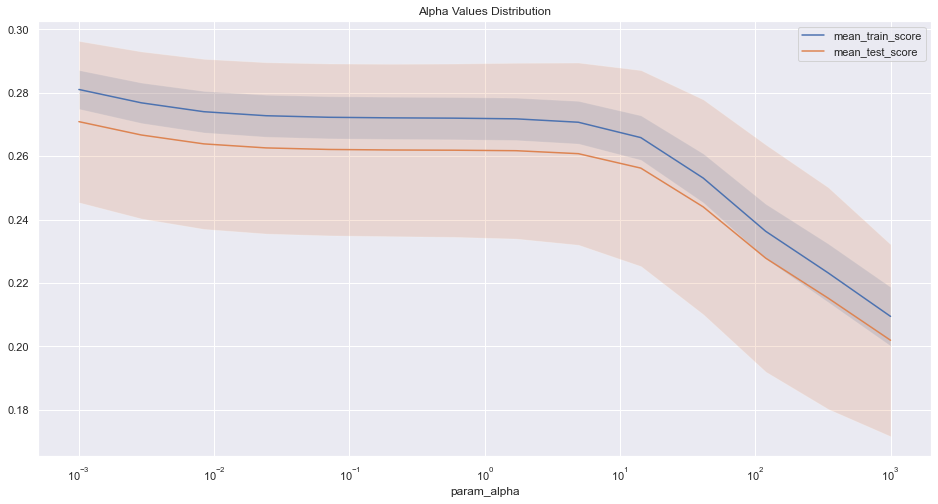

In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


##find optimal alpha

param_grid = {"alpha": np.logspace(-3, 3, 14)}

def get_grid(model, params, xtrain, ytrain, cv = 5):

    grid = GridSearchCV(model, params, return_train_score=True, cv =5).fit(xtrain, ytrain)
    
    return grid


def get_alpha_plot(grid, print_results = False):

    if print_results:
        for key in grid.cv_results_.keys():
            print(f"{key}: {grid.cv_results_[key]}")

    print(f"[+] Best param: {grid.best_params_}")
    print(f"[+] Best score: {grid.best_score_}")


    results = pd.DataFrame(grid.cv_results_) 
    results.plot('param_alpha', 'mean_train_score')
    results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
    plt.fill_between(results.param_alpha.astype(float),
                    results['mean_train_score'] + results['std_train_score'],
                    results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results.param_alpha.astype(float),
                    results['mean_test_score'] + results['std_test_score'],
                    results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")
    plt.title("Alpha Values Distribution")


#create grid
ridge1_redwine_grid = get_grid(ridge1_redwine, param_grid, X_train, y_train)


#create plot
get_alpha_plot(ridge1_redwine_grid)

Using gridsearchCV we find the optimal alpha, using L2 regularisation we fit an additional constraint to help and avoid overfitting. We find an optimal alpha of 0.203, which denotes the amount of constraint implemented in the model. 

Now we find the optimal parameter for the Lasso Regression.

[+] Best param: {'alpha': 0.001}
[+] Best score: 0.2618165492003671


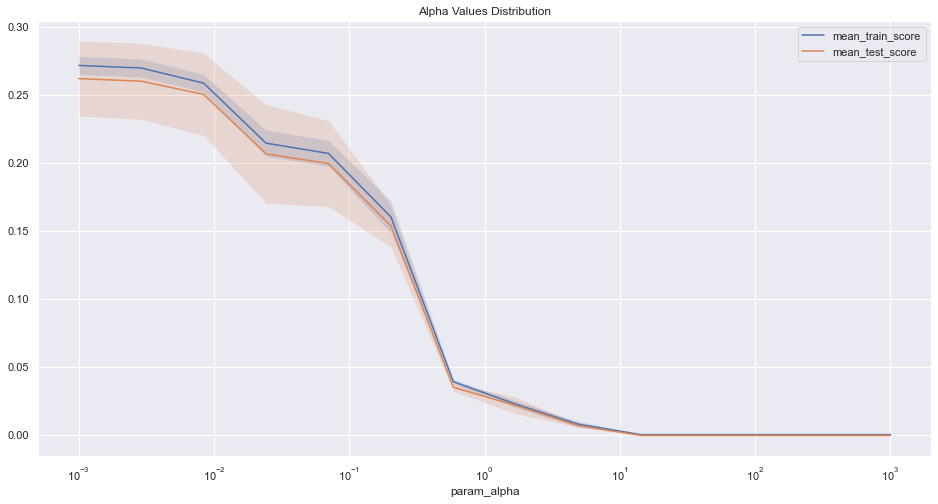

In [21]:
#create grid
lasso1_redwine_grid = get_grid(lasso1_redwine, param_grid, X_train, y_train)


#create plot
get_alpha_plot(lasso1_redwine_grid)

Least absolute shrinkage and selection operator, Lasso is an L1 regularisation, a consequence of lasso compared to ridge is that some coefficients are exactly zero, which means that some features could be entirely ignored by the model.   

Then lastly, the parameters of the ElasticNet regression

[+] Best param: {'alpha': 0.001}
[+] Best score: 0.2616507077014254


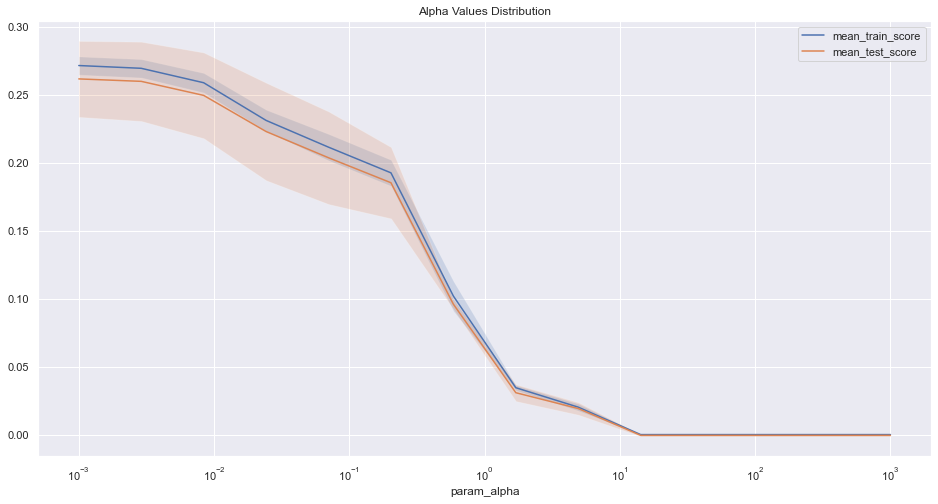

In [22]:

#define grid
elastic1_redwine_grid = get_grid(elastic1_redwine, param_grid, X_train, y_train)

#create plot
get_alpha_plot(elastic1_redwine_grid)

Now we also find the optimal value for the l1_ratio parameter in the ElasticNet Regression.

[+] Best param: {'l1_ratio': 1e-05}
[+] Best score: 0.17052148342222956


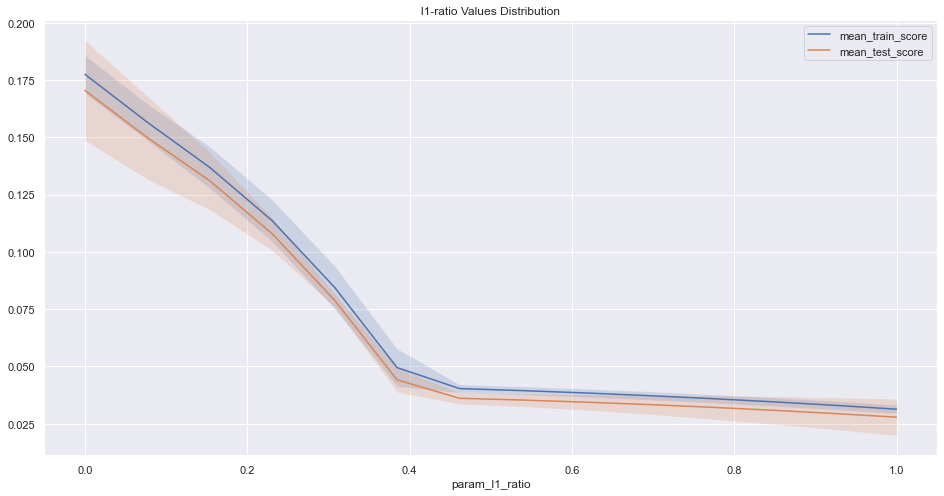

In [23]:
## to get optimal l1_ratio in the elasticNet 

def get_l1_plot(grid, print_results = False):

    if print_results:
        for key in grid.cv_results_.keys():
            print(f"{key}: {grid.cv_results_[key]}")


    #results.get_params().keys()
    results = pd.DataFrame(grid.cv_results_)

    print(f"[+] Best param: {grid.best_params_}")
    print(f"[+] Best score: {grid.best_score_}")
    
    results.plot('param_l1_ratio', 'mean_train_score')
    results.plot('param_l1_ratio', 'mean_test_score', ax=plt.gca())
    plt.fill_between(results.param_l1_ratio.astype(float),
                    results['mean_train_score'] + results['std_train_score'],
                    results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results.param_l1_ratio.astype(float),
                    results['mean_test_score'] + results['std_test_score'],
                    results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    #plt.xscale("lin")
    plt.title("l1-ratio Values Distribution")


#define l1-ratio parameter space in a log space.
params_l1_grid = {"l1_ratio": np.linspace(0.00001, 1, 14)}

#define l1 grid
l1_grid = get_grid(elastic1_redwine, params_l1_grid, X_train, y_train)

get_l1_plot(l1_grid)

Elasticnet regressions implements both L1 and L2 regularisation

### White Wine data

The white wine data split was stored in X_train2, X_test2, y_train2, y_test2

In [24]:
#RIDGE regression

##define and fit Ridge model
ridge1_whitewine = ridge_model(X_train2, y_train2)

##summary for Ridge regression
regression_summary(ridge1_whitewine, X_train2, y_train2)

R2 score: 0.35444879143399355
Mean Squared Error: 0.43112516527862754
Mean Absolute Error: 0.5097962486289906


Now the Lasso regression.

In [25]:
#define and fit Lasso model on white wine dataset
lasso1_whitewine = fit_lasso(X_train2, y_train2)

#Get summary from Lasso model
regression_summary(lasso1_whitewine, X_train2, y_train2)

R2 score: 0.024281020786325103
Mean Squared Error: 0.6516245351215664
Mean Absolute Error: 0.6680978497424399


Lastly, the ElasticNet regression on the white wine.

In [26]:
#define and fit ElasticNet model on white wine dataset
elastic1_whitewine = elasticNet_model(X_train2, y_train2)

##summary for Ridge regression
regression_summary(elastic1_whitewine, X_train2, y_train2)


R2 score: 0.025372573089751826
Mean Squared Error: 0.6508955524150349
Mean Absolute Error: 0.6649491997045499


**Now using the GridSearchCV class to find the optimal parameters for the regressions made with the white wine dataset** 

Firstly, the parameters for the Ridge Regression on the white wine dataset.

[+] Best param: {'alpha': 0.2030917620904737}
[+] Best score: 0.3372784785961661


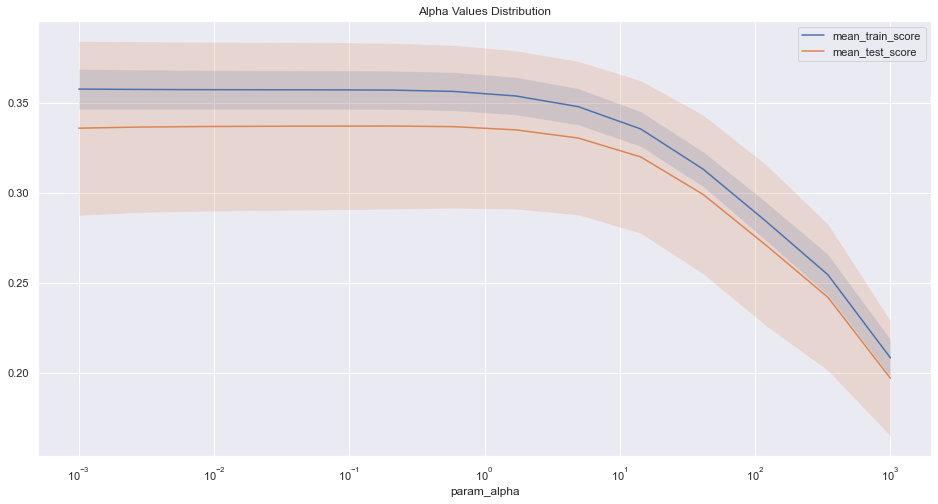

In [27]:
#create grid
ridge1_whitewine_grid = get_grid(ridge1_whitewine, param_grid, X_train2, y_train2)


#create plot
get_alpha_plot(ridge1_whitewine_grid)

Then for the Lasso regression model on the white wine dataset.

[+] Best param: {'alpha': 0.001}
[+] Best score: 0.33647942353237836


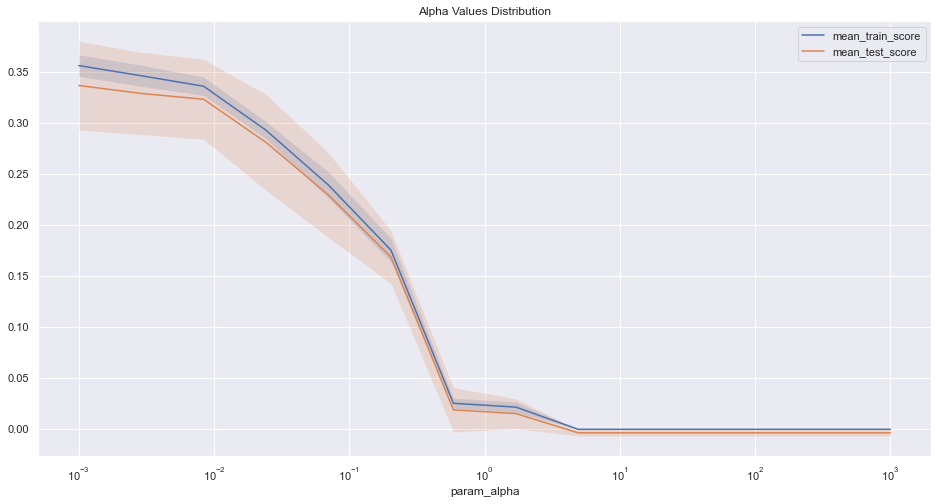

In [28]:
#create grid
lasso1_whitewine_grid = get_grid(lasso1_whitewine, param_grid, X_train2, y_train2)


#create plot
get_alpha_plot(lasso1_whitewine_grid)

Then for the ElasticNet regression on the white wine data.

[+] Best param: {'alpha': 0.001}
[+] Best score: 0.3364042572032012


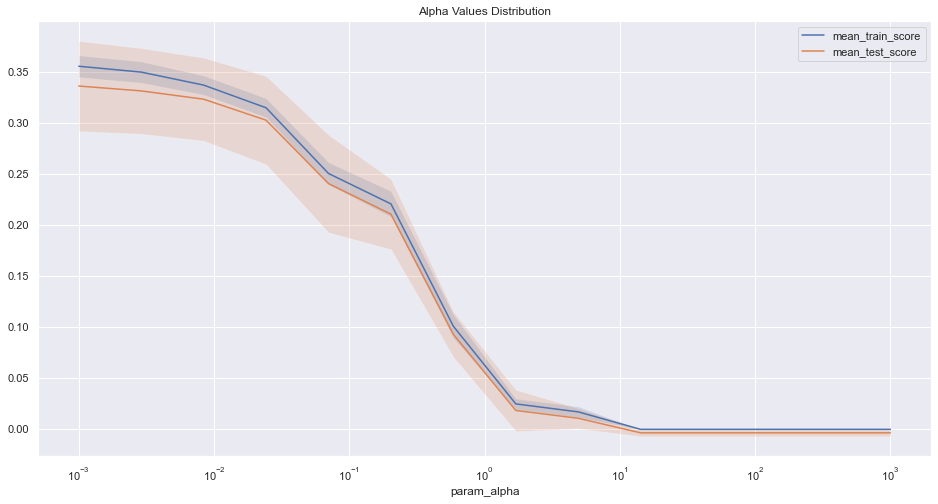

In [29]:

#define grid
elastic1_whitewine_grid = get_grid(elastic1_whitewine, param_grid, X_train2, y_train2)

#create plot
get_alpha_plot(elastic1_whitewine_grid)

Now we also find the optimal value for the l1_ratio parameter in the ElasticNet Regression on the white wine data set.


[+] Best param: {'l1_ratio': 1e-05}
[+] Best score: 0.1994600581344483


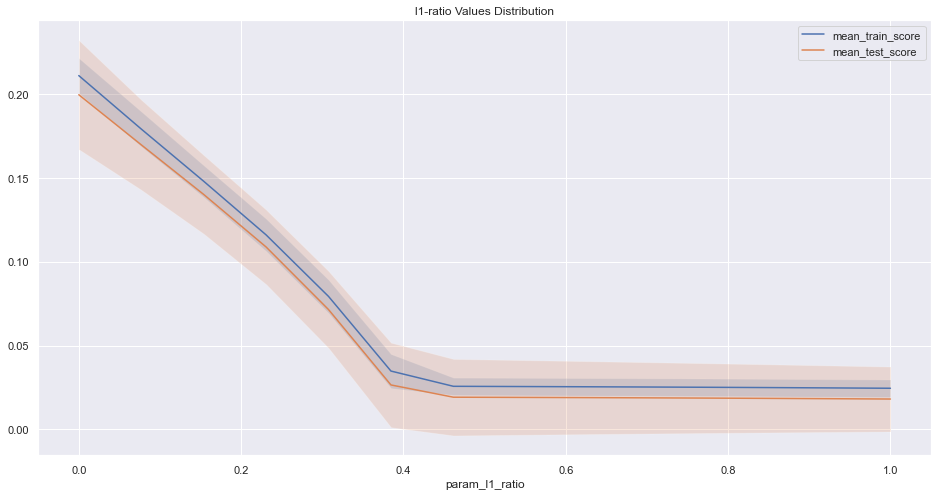

In [30]:
#define l1 grid
l1_grid_white = get_grid(elastic1_whitewine, params_l1_grid, X_train2, y_train2)

get_l1_plot(l1_grid_white)

## Analysis of Findings

**Lasso and ElasticNet regression had optimal alpha's of 0.001, while Ridge alpha has an optimal alpha of 0.2030917620904737 in the white wine dataset. Lasso and ElasticNet regression could be well replaced with a regular OLS model because of their low alpha's. All optimal alphas for the red wine are 0.001, which indicatoes that OLS may best fit our red wine data. Here we investigate if Ridge is indeed the best fit on our white wine data and OLS is the best fit on our red wine data.**

We do this by inputting all best alphas into the models and make them return their R2 coefficient. We compare all the values and find the best fit.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
 
all_models_red = {
                    "Ridge": ridge_model(X_train, y_train, alpha = 0.001), 
                    "Lasso": fit_lasso(X_train, y_train, alpha = 0.001), 
                    "ElasticNet": elasticNet_model(X_train, y_train, alpha = 0.001),
                    "OLS": LinearRegression().fit(X_train, y_train)}
 
all_models_white = {
                    "Ridge": ridge_model(X_train2, y_train2, alpha = 0.2030917620904737), 
                    "Lasso": fit_lasso(X_train2, y_train2, alpha = 0.001), 
                    "ElasticNet": elasticNet_model(X_train2, y_train2, alpha = 0.001),
                    "OLS": LinearRegression().fit(X_train2, y_train2)}
 
highest_red_train = 0.0
highest_red_test = 0.0
highest_white_train = 0.0
highest_white_test = 0.0
 
highest_red_train_str = ""
highest_red_test_str = ""
highest_white_train_str = ""
highest_white_test_str = ""
 
# print("[+] Red wine data")
for key in all_models_red.keys():
    _train = np.mean(cross_val_score(all_models_red[key], X_train, y_train, cv =10))
    _test = np.mean(cross_val_score(all_models_red[key], X_test, y_test, cv =10))
    # print(f"[+]{key}\nCV score on train set: {_train}")
    # print(f"CV score on test set: {_test}\n")
 
    #check if highest
    if _train >highest_red_train:
        highest_red_train=_train
        highest_red_train_str = key
 
    if _test >highest_red_test:
        highest_red_test=_test
        highest_red_test_str = key
 
 
# print("-------------------\n[+] White wine data")
for key in all_models_white.keys():
    _train = np.mean(cross_val_score(all_models_white[key], X_train2, y_train2, cv =10))
    _test = np.mean(cross_val_score(all_models_white[key], X_test2, y_test2, cv =10))
 
    # print(f"[+]{key}\nCV score on train set: {_train}")
    # print(f"CV score on test set: {_test}\n")
 
    #check if highest
    if _train >highest_white_train:
        highest_white_train=_train
        highest_white_train_str = key
 
    if _test >highest_white_test:
        highest_white_test=_test
        highest_white_test_str = key
 
print("[+] Red wine data")
print(f"Best performing model on train set from red wine: {highest_red_train_str}: {highest_red_train}")
print(f"Best performing model on test set from red wine: {highest_red_test_str}: {highest_red_test}\n\n")
 
print("[+] White wine data")
print(f"Best performing model on train set from white wine: {highest_white_train_str}: {highest_white_train}")
print(f"Best performing model on test set from white wine: {highest_white_test_str}: {highest_white_test}\n\n")

[+] Red wine data
Best performing model on train set from red wine: OLS: 0.27611214769415365
Best performing model on test set from red wine: Ridge: 0.2685685686767186


[+] White wine data
Best performing model on train set from white wine: Ridge: 0.3356062234326267
Best performing model on test set from white wine: ElasticNet: 0.3283730975666555




So indeed we see that OLS is the best fit for the red wine data. All best alpha parameters were extremely close to 0 in the regression models on the red wine data, hence the above analysis. Ridge regression (alpha = 0.2030917620904737)) is the best performing model for the white wine data. 